In [1]:
import pandas as pd
import geopandas as gpd
from shapely.ops import unary_union

In [2]:
import pandas
print(pandas.__file__)


c:\Users\dines\anaconda3\envs\soilwater_env\Lib\site-packages\pandas\__init__.py


In [3]:
import pandas
print(pandas.__path__)


['c:\\Users\\dines\\anaconda3\\envs\\soilwater_env\\Lib\\site-packages\\pandas']


In [4]:
import pandas
print(pandas.__package__)
print(type(pandas))


pandas
<class 'module'>


In [5]:
import matplotlib.pyplot as plt

In [6]:
import numpy as np

In [7]:
pd.__version__

'2.2.3'

In [66]:
# Load all shapefiles
aoi = gpd.read_file("cleaned_aoi/cleaned_aoi.shp")
partial1 = gpd.read_file("Above_Topaz/Above_Topaz.shp")
partial2 = gpd.read_file("Below_Topaz/Below_Topaz.shp")

In [67]:
print(aoi.crs, partial1.crs, partial2.crs)

EPSG:4326 EPSG:8826 EPSG:8826


In [ ]:
# from pynhd import NLDI
# from pygeohydro import WBD
# import geopandas as gpd

# # Fetch HUC-8 boundary using pygeohydro
# wbd = WBD()
# aoi = wbd.by_huc8("17040208")

# aoi.to_file("portneuf_aoi_clean.shp")


In [ ]:
# from pynhd import NLDI
# from pygeohydro import WBD
# import geopandas as gpd

# # Fetch HUC-8 boundary using pygeohydro
# wbd = WBD()
# aoi = wbd.by_huc8("17040208")

# aoi.to_file("portneuf_aoi_clean.shp")


In [62]:
# # Match CRS
# crs = aoi.crs
# partial1 = partial1.to_crs(crs)
# partial2 = partial2.to_crs(crs)

# # Clean up geometries
# for gdf in [partial1, partial2, aoi]:
#     cols_to_drop = [col for col in gdf.columns if col not in ['geometry']]
#     gdf.drop(columns=cols_to_drop, inplace=True, errors='ignore')


# # Merge partial geometries
# merged_partial = unary_union(partial1.geometry.union(partial2.geometry))

# # Subtract from AOI
# aoi_union = unary_union(aoi.geometry)
# remaining_geom = aoi_union.difference(merged_partial).buffer(0)
# remaining = gpd.GeoDataFrame(geometry=[remaining_geom], crs=crs)

# # Add ID and Name to each
# partial1_clean = gpd.GeoDataFrame({
#     "ID": [101],
#     "Name": ["Above Topaz"],
#     "geometry": [partial1.union_all()]
# }, crs=crs)

# partial2_clean = gpd.GeoDataFrame({
#     "ID": [102],
#     "Name": ["Below Topaz"],
#     "geometry": [partial2.union_all()]
# }, crs=crs)

# remaining_clean = gpd.GeoDataFrame({
#     "ID": [103],
#     "Name": ["Remaining Area"],
#     "geometry": [remaining_geom]
# }, crs=crs)

# # Combine
# final_gdf = pd.concat([partial1_clean, partial2_clean, remaining_clean], ignore_index=True)
# final_gdf = gpd.GeoDataFrame(final_gdf, crs=crs)


In [68]:
# Match CRS
crs = aoi.crs
partial1 = partial1.to_crs(crs)
partial2 = partial2.to_crs(crs)

# Merge partials
partial_merged = gpd.GeoDataFrame(
    geometry=[partial1.geometry.union_all().union(partial2.geometry.union_all())],
    crs=crs
)

# Clean all geometry
aoi['geometry'] = aoi.buffer(0)
partial_merged['geometry'] = partial_merged.buffer(0)

# Clip AOI to only keep the portion *outside* merged partials
remaining = gpd.overlay(aoi, partial_merged, how='difference')
remaining['geometry'] = remaining.buffer(0)

# Optional: Ensure remaining is completely within AOI
remaining = gpd.overlay(remaining, aoi, how='intersection')

# Assign fields
partial1_clean = gpd.GeoDataFrame({
    "ID": [101],
    "Name": ["Partial Area 1"],
    "geometry": [partial1.geometry.union_all()]
}, crs=crs)

partial2_clean = gpd.GeoDataFrame({
    "ID": [102],
    "Name": ["Partial Area 2"],
    "geometry": [partial2.geometry.union_all()]
}, crs=crs)

remaining["ID"] = 103
remaining["Name"] = "Remaining AOI"

# Final merge
final_gdf = pd.concat([partial1_clean, partial2_clean, remaining], ignore_index=True)
final_gdf = gpd.GeoDataFrame(final_gdf, crs=crs)


C:\Users\dines\AppData\Local\Temp\ipykernel_26324\871230376.py:21: UserWarning: `keep_geom_type=True` in overlay resulted in 5301 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  remaining = gpd.overlay(remaining, aoi, how='intersection')


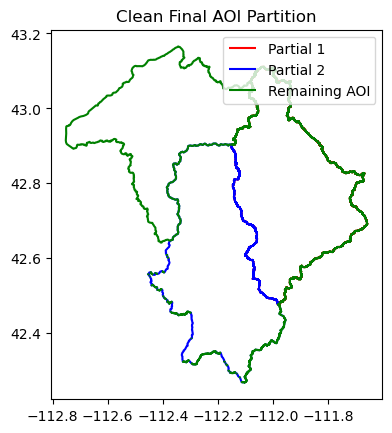

In [69]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
final_gdf[final_gdf["Name"] == "Partial Area 1"].boundary.plot(ax=ax, color='red', label='Partial 1')
final_gdf[final_gdf["Name"] == "Partial Area 2"].boundary.plot(ax=ax, color='blue', label='Partial 2')
final_gdf[final_gdf["Name"] == "Remaining AOI"].boundary.plot(ax=ax, color='green', label='Remaining AOI')
plt.legend()
plt.title("Clean Final AOI Partition")
plt.show()


In [53]:
partial1

,geometry
0,"MULTIPOLYGON (((-112.07294 42.54489, -112.0729..."


In [71]:
final_gdf

,ID,Name,geometry,sourcedata_1,areaacres_1,sourcefeat_1,shape_leng_1,states_1,sourceorig_1,huc8_1,...,huc8_2,areasqkm_2,name_2,tnmid_2,metasource_2,loaddate_2,gnis_id_2,ORIG_FID_2,Shape_Le_1_2,Shape_Area_2
0,101,Partial Area 1,"MULTIPOLYGON (((-112.07306 42.54489, -112.0729...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,102,Partial Area 2,"POLYGON ((-111.97984 42.4761, -111.97977 42.47...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,103,Remaining AOI,"MULTIPOLYGON (((-112.10683 42.26886, -112.1069...",None,1073424.78,None,4.579966477994,ID,None,17040208,...,17040208,4344,Portneuf,{38B3506D-036C-4780-8737-BB63CA45917A},None,20130118135515,None,0.0,4.579968,0.477747


<Axes: >

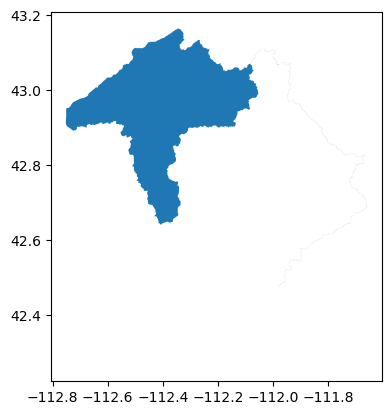

In [70]:
remaining.plot()

In [57]:
print(partial1.is_valid.all(), partial2.is_valid.all(), aoi.is_valid.all())


True True True


In [56]:
# Save to a new shapefile
final_gdf.to_file("portneuf_3aoi/portneuf_3aoi.shp")

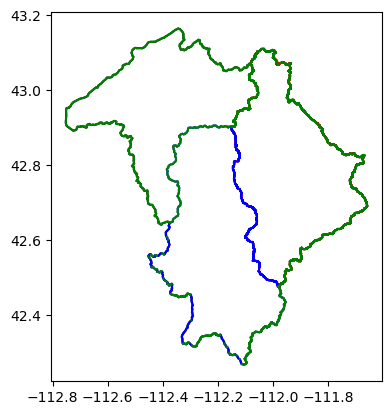

In [58]:
fig, ax = plt.subplots()
aoi.boundary.plot(ax=ax, color='black')
partial1.boundary.plot(ax=ax, color='red')
partial2.boundary.plot(ax=ax, color='blue')
remaining.boundary.plot(ax=ax, color='green')
plt.show()


In [75]:
pd.__version__

'2.1.4'